In [27]:
# #age: Age of the patient in years.
# sex: Sex of the patient. (1 = male, 0 = female)
# cp (chest pain type):
# 0: Typical angina
# 1: Atypical angina
# 2: Non-anginal pain
# 3: Asymptomatic
# trestbps (resting blood pressure): Resting blood pressure in mm Hg on admission to the hospital.
# chol (serum cholestoral): Serum cholesterol in mg/dl.
# fbs (fasting blood sugar): Fasting blood sugar > 120 mg/dl. (1 = true, 0 = false)
# restecg (resting electrocardiographic results):
# 0: Normal
# 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach (maximum heart rate achieved): Maximum heart rate achieved during the test.
# exang (exercise-induced angina): Exercise-induced angina. (1 = yes, 0 = no)
# oldpeak : ST depression induced by exercise relative to rest.
# slope (the slope of the peak exercise ST segment):
# 0: Upsloping
# 1: Flat
# 2: Downsloping
# ca (number of major vessels colored by fluoroscopy): Number of major vessels (0-3) colored by fluoroscopy.
# thal (thalassemia):
# 1: Normal
# 2: Fixed defect
# 3: Reversible defect

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('heart.csv')

# Basic Information
print("Basic info")
print(data.info())
print(data.describe())



Basic info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997

In [29]:

# Missing Values
print("Missing values")
print(data.isnull().sum())



Missing values
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Universal analysis categorical variables


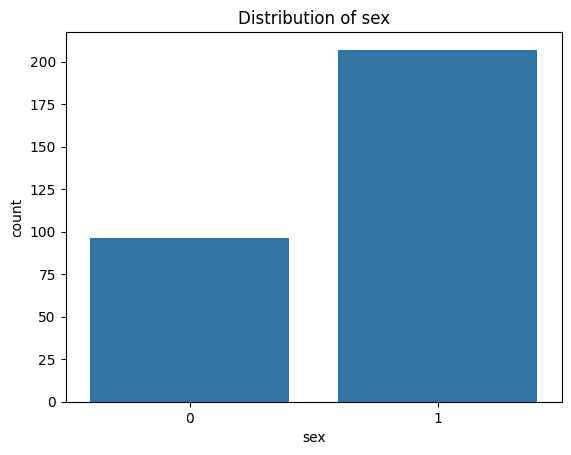

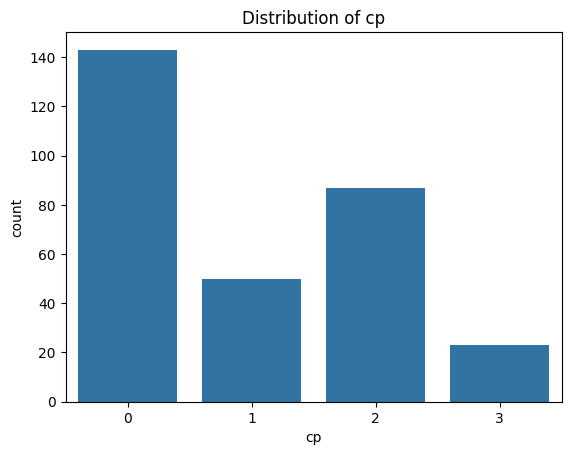

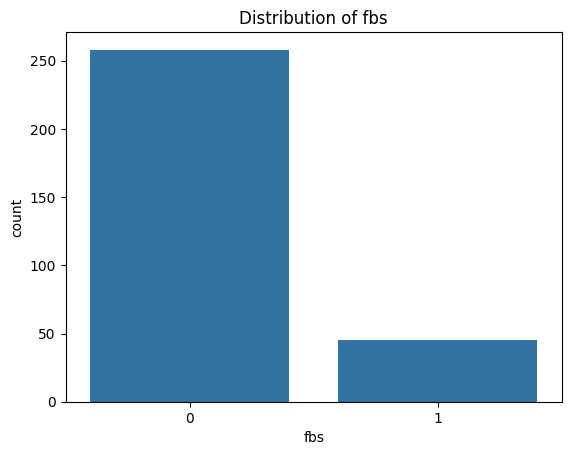

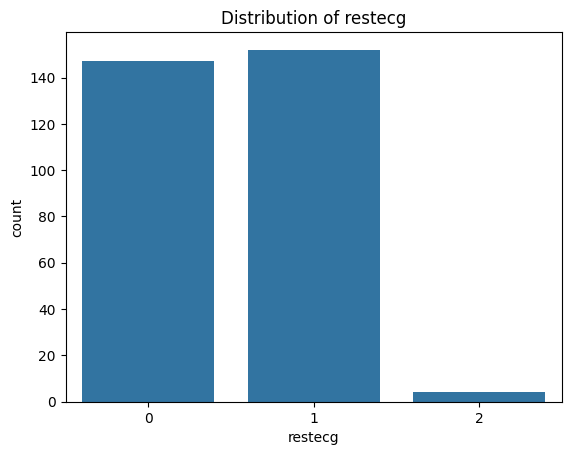

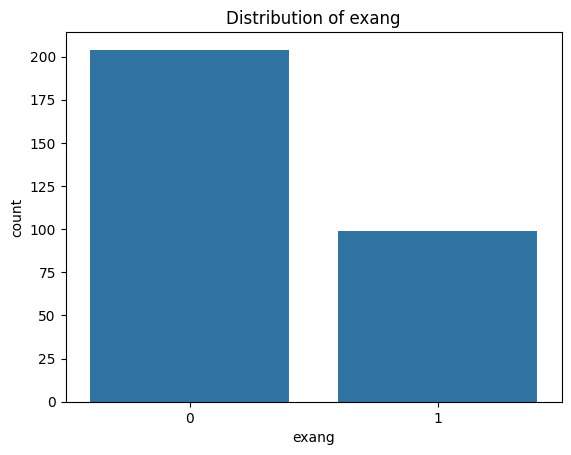

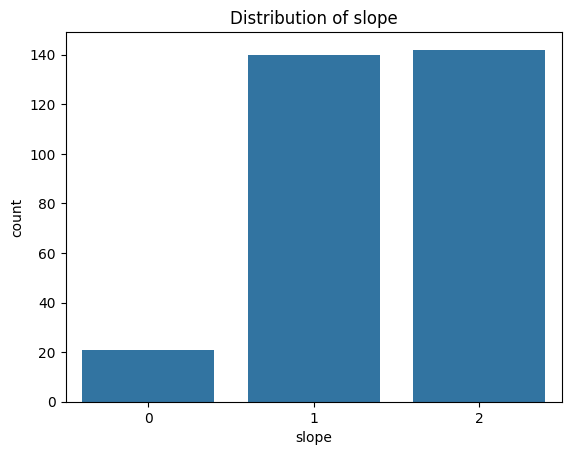

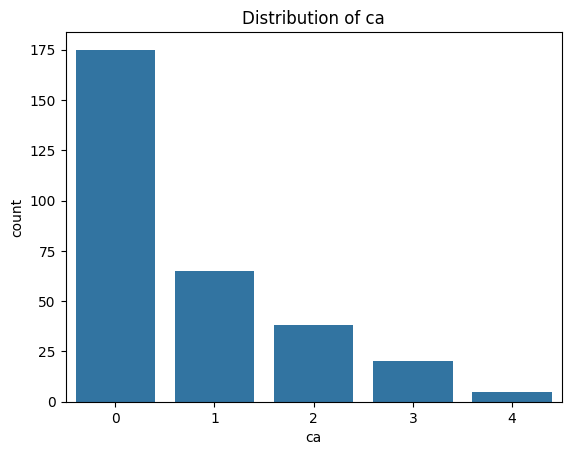

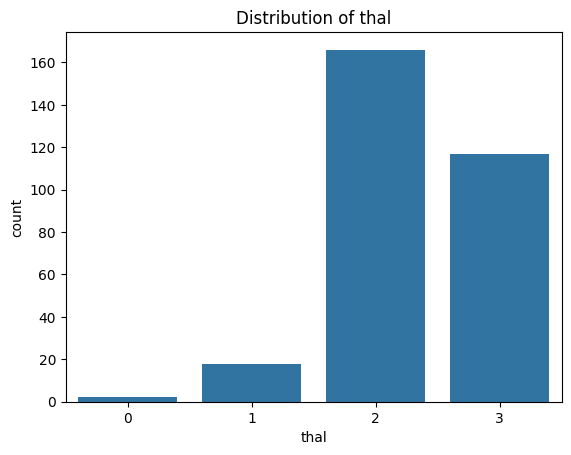

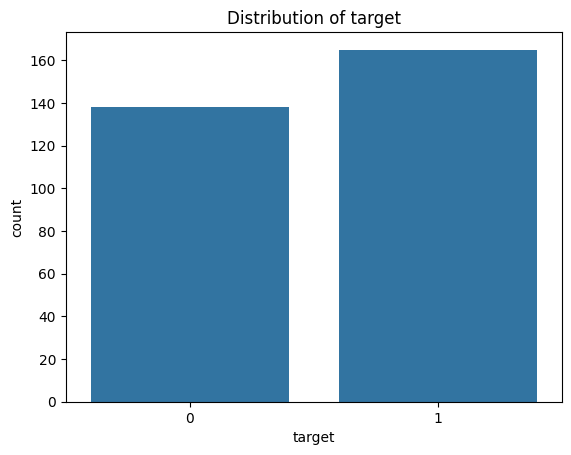

In [30]:
# Univariate Analysis - Categorical Variables
print("Universal analysis categorical variables")
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


Universal analysis numerical variables


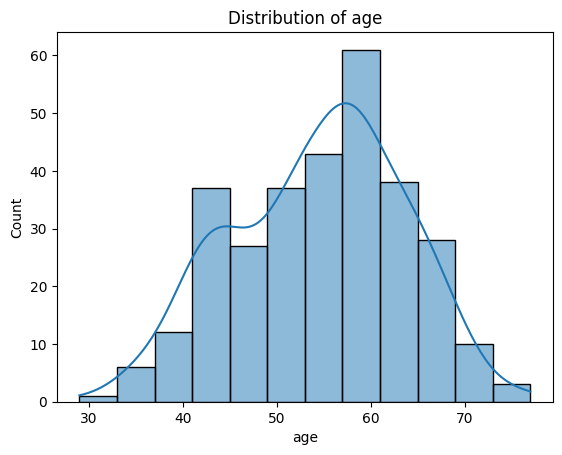

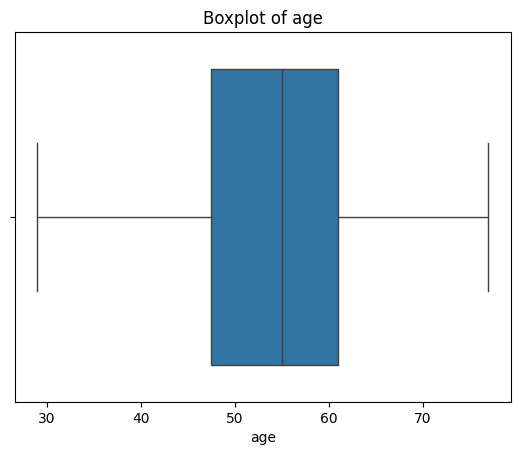

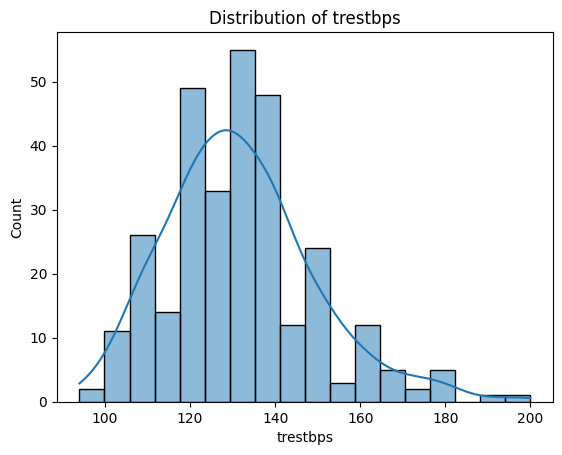

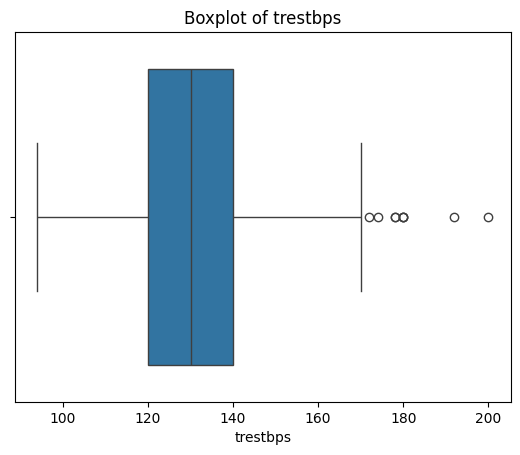

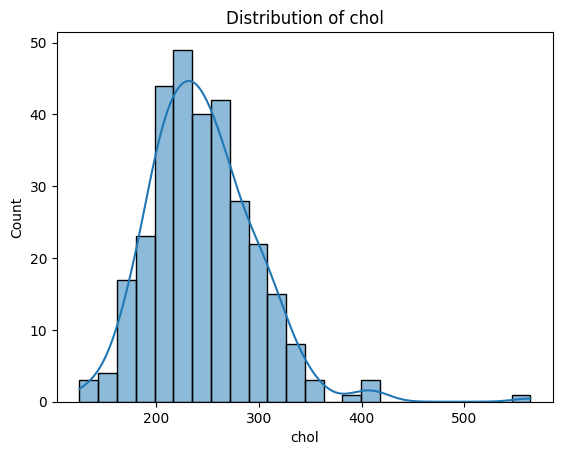

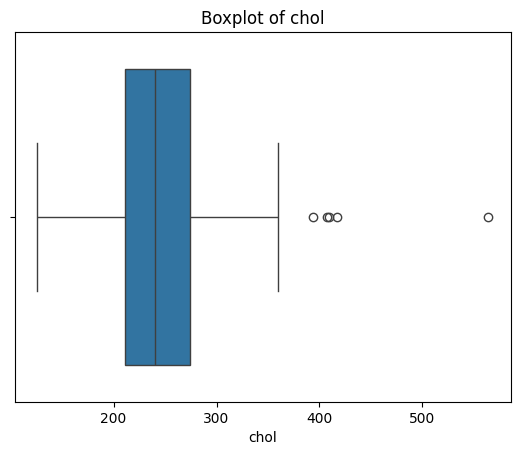

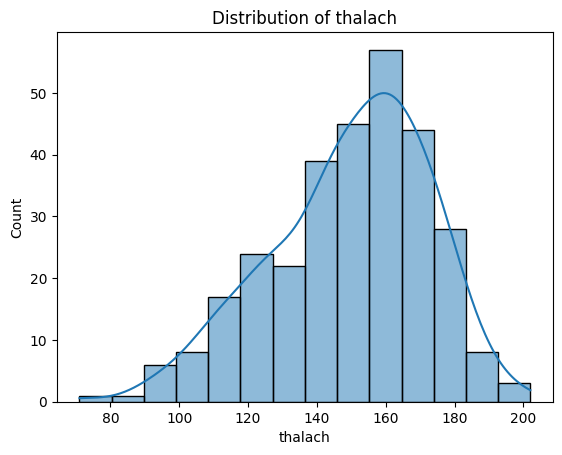

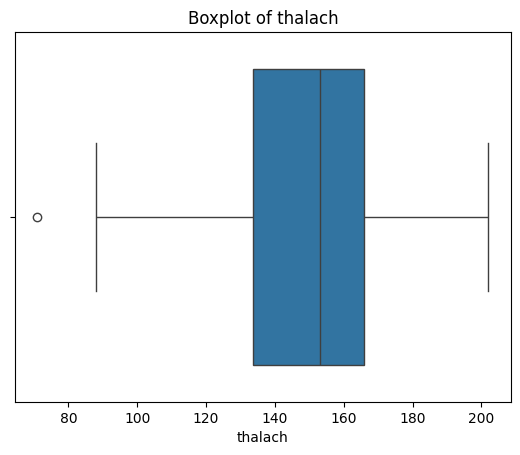

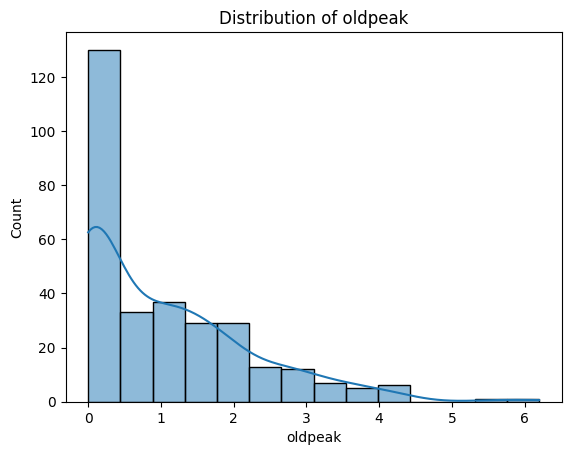

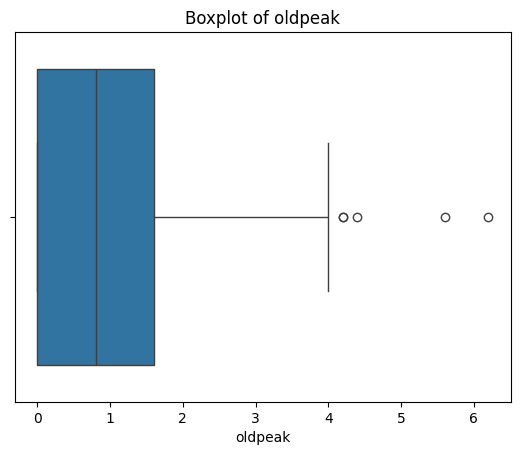

In [31]:

# Univariate Analysis - Numerical Variables
print("Universal analysis numerical variables")
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Bivariable analysis categorical variables vs target


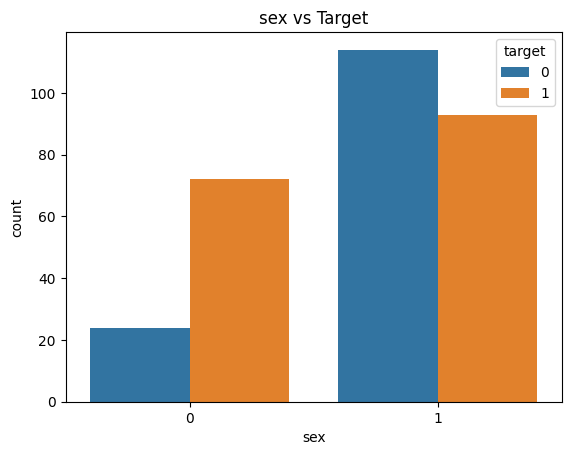

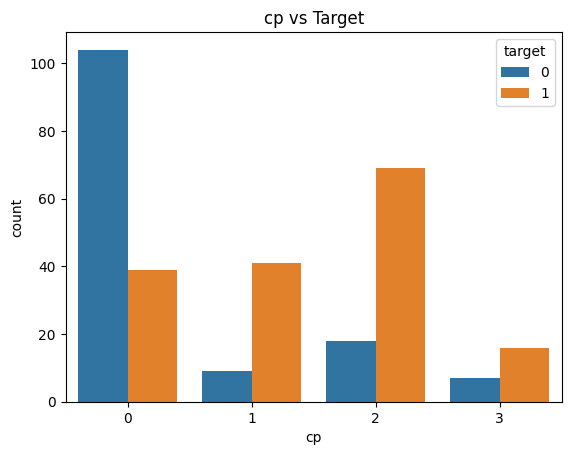

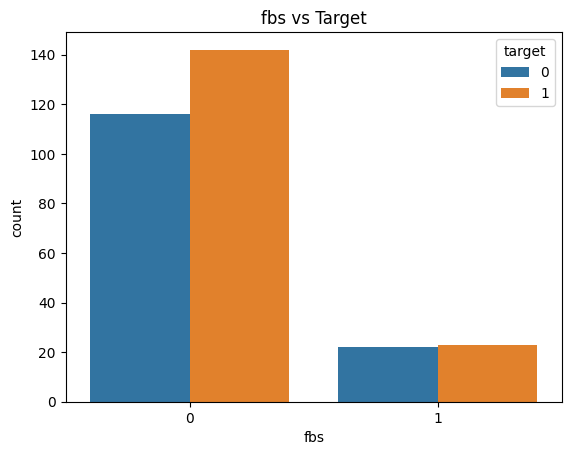

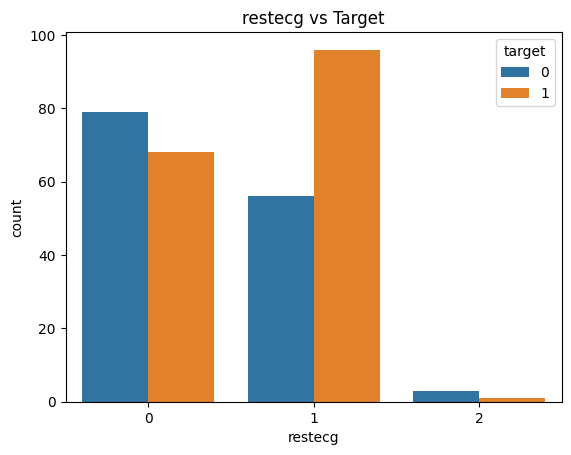

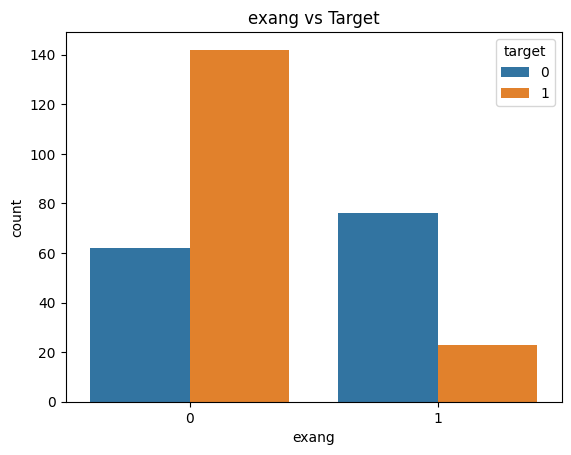

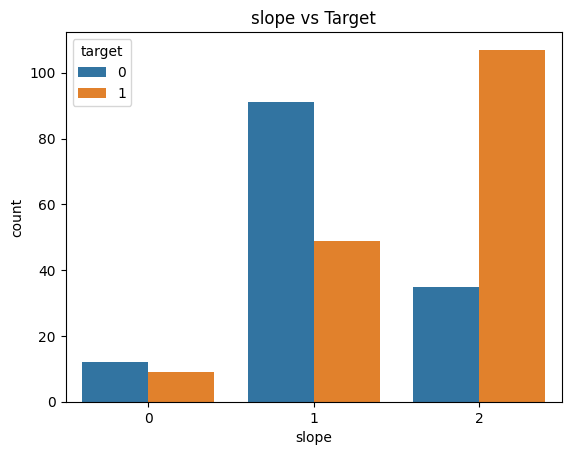

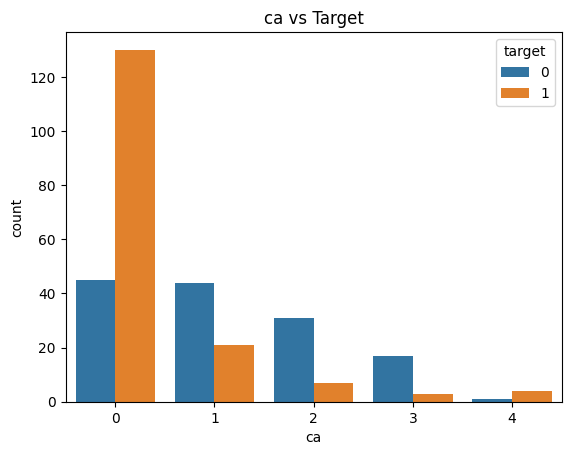

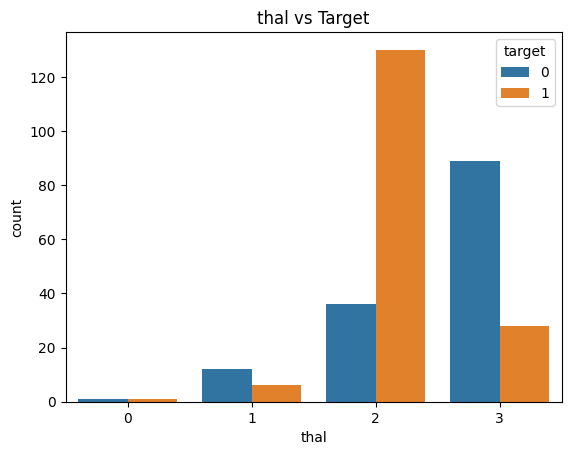

In [32]:

# Bivariate Analysis - Categorical vs Target
print("Bivariable analysis categorical variables vs target")
for col in categorical_columns[:-1]:  # exclude target itself
    sns.countplot(x=col, hue='target', data=data)
    plt.title(f'{col} vs Target')
    plt.show()


Bivariable analysis numerical variables vs target


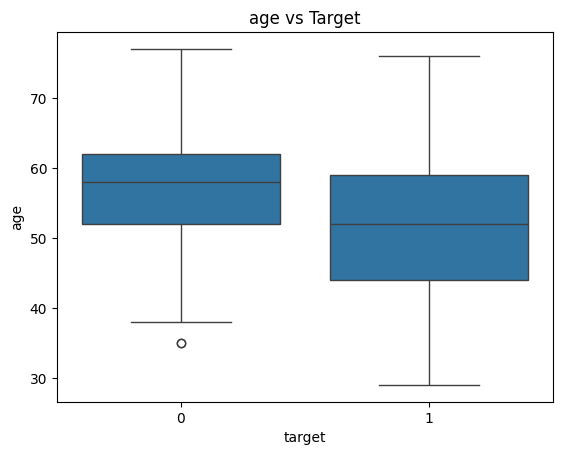

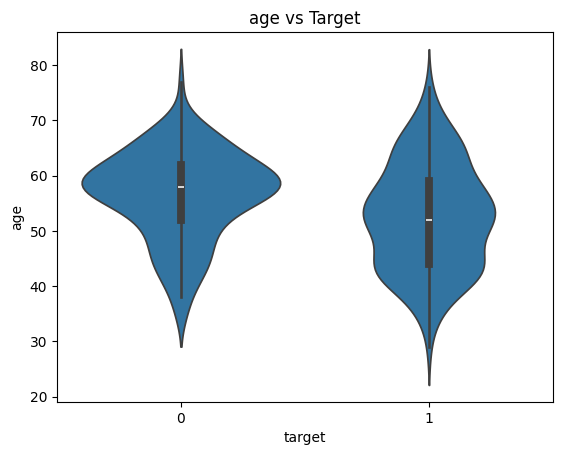

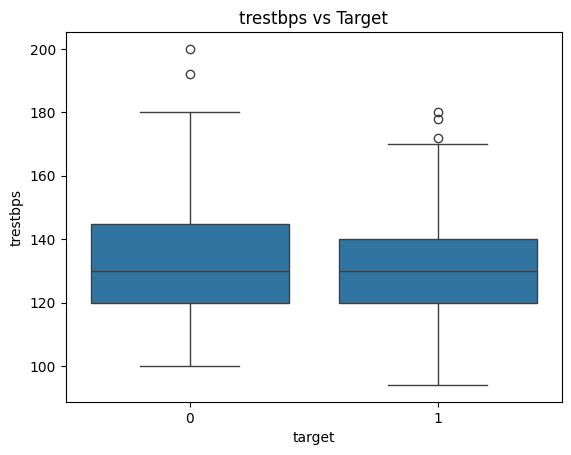

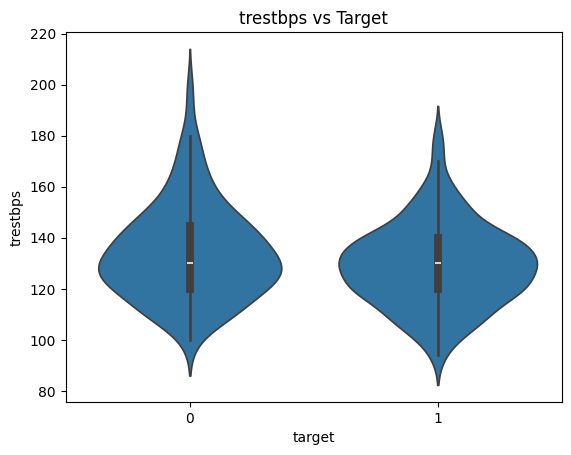

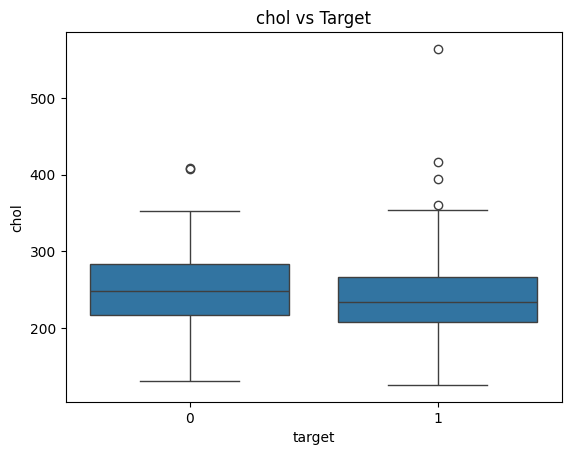

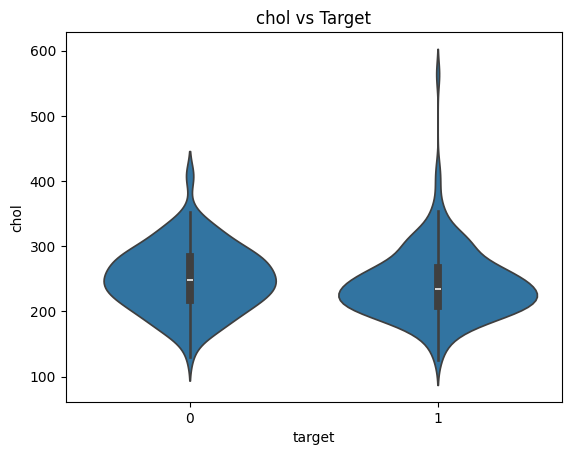

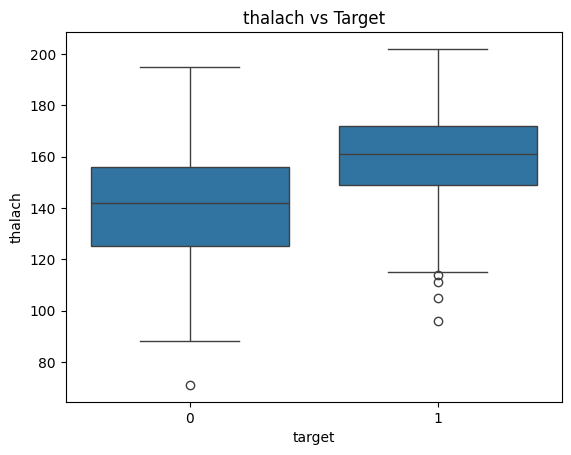

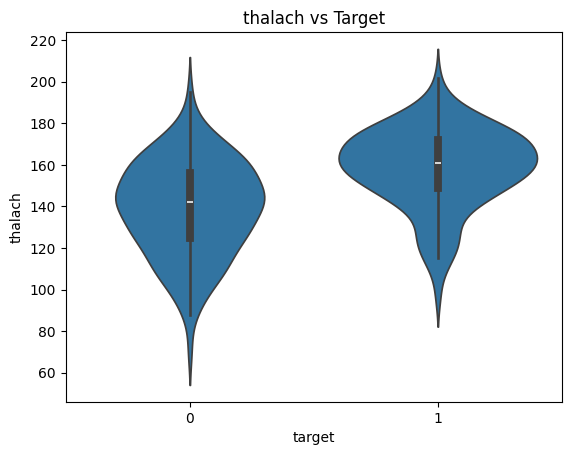

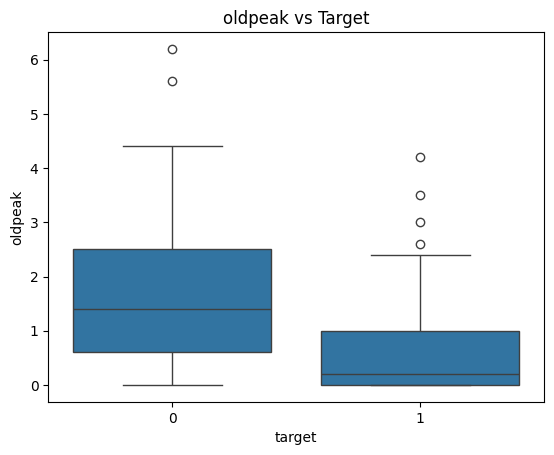

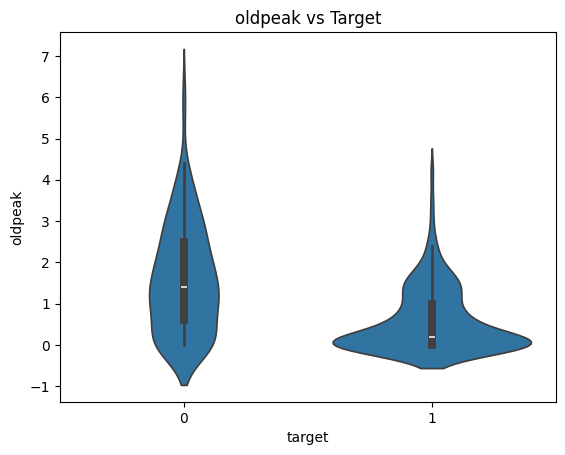

In [33]:

# Bivariate Analysis - Numerical vs Target
print("Bivariable analysis numerical variables vs target")
for col in numerical_columns:
    sns.boxplot(x='target', y=col, data=data)
    plt.title(f'{col} vs Target')
    plt.show()
    sns.violinplot(x='target', y=col, data=data)
    plt.title(f'{col} vs Target')
    plt.show()


Pair plot


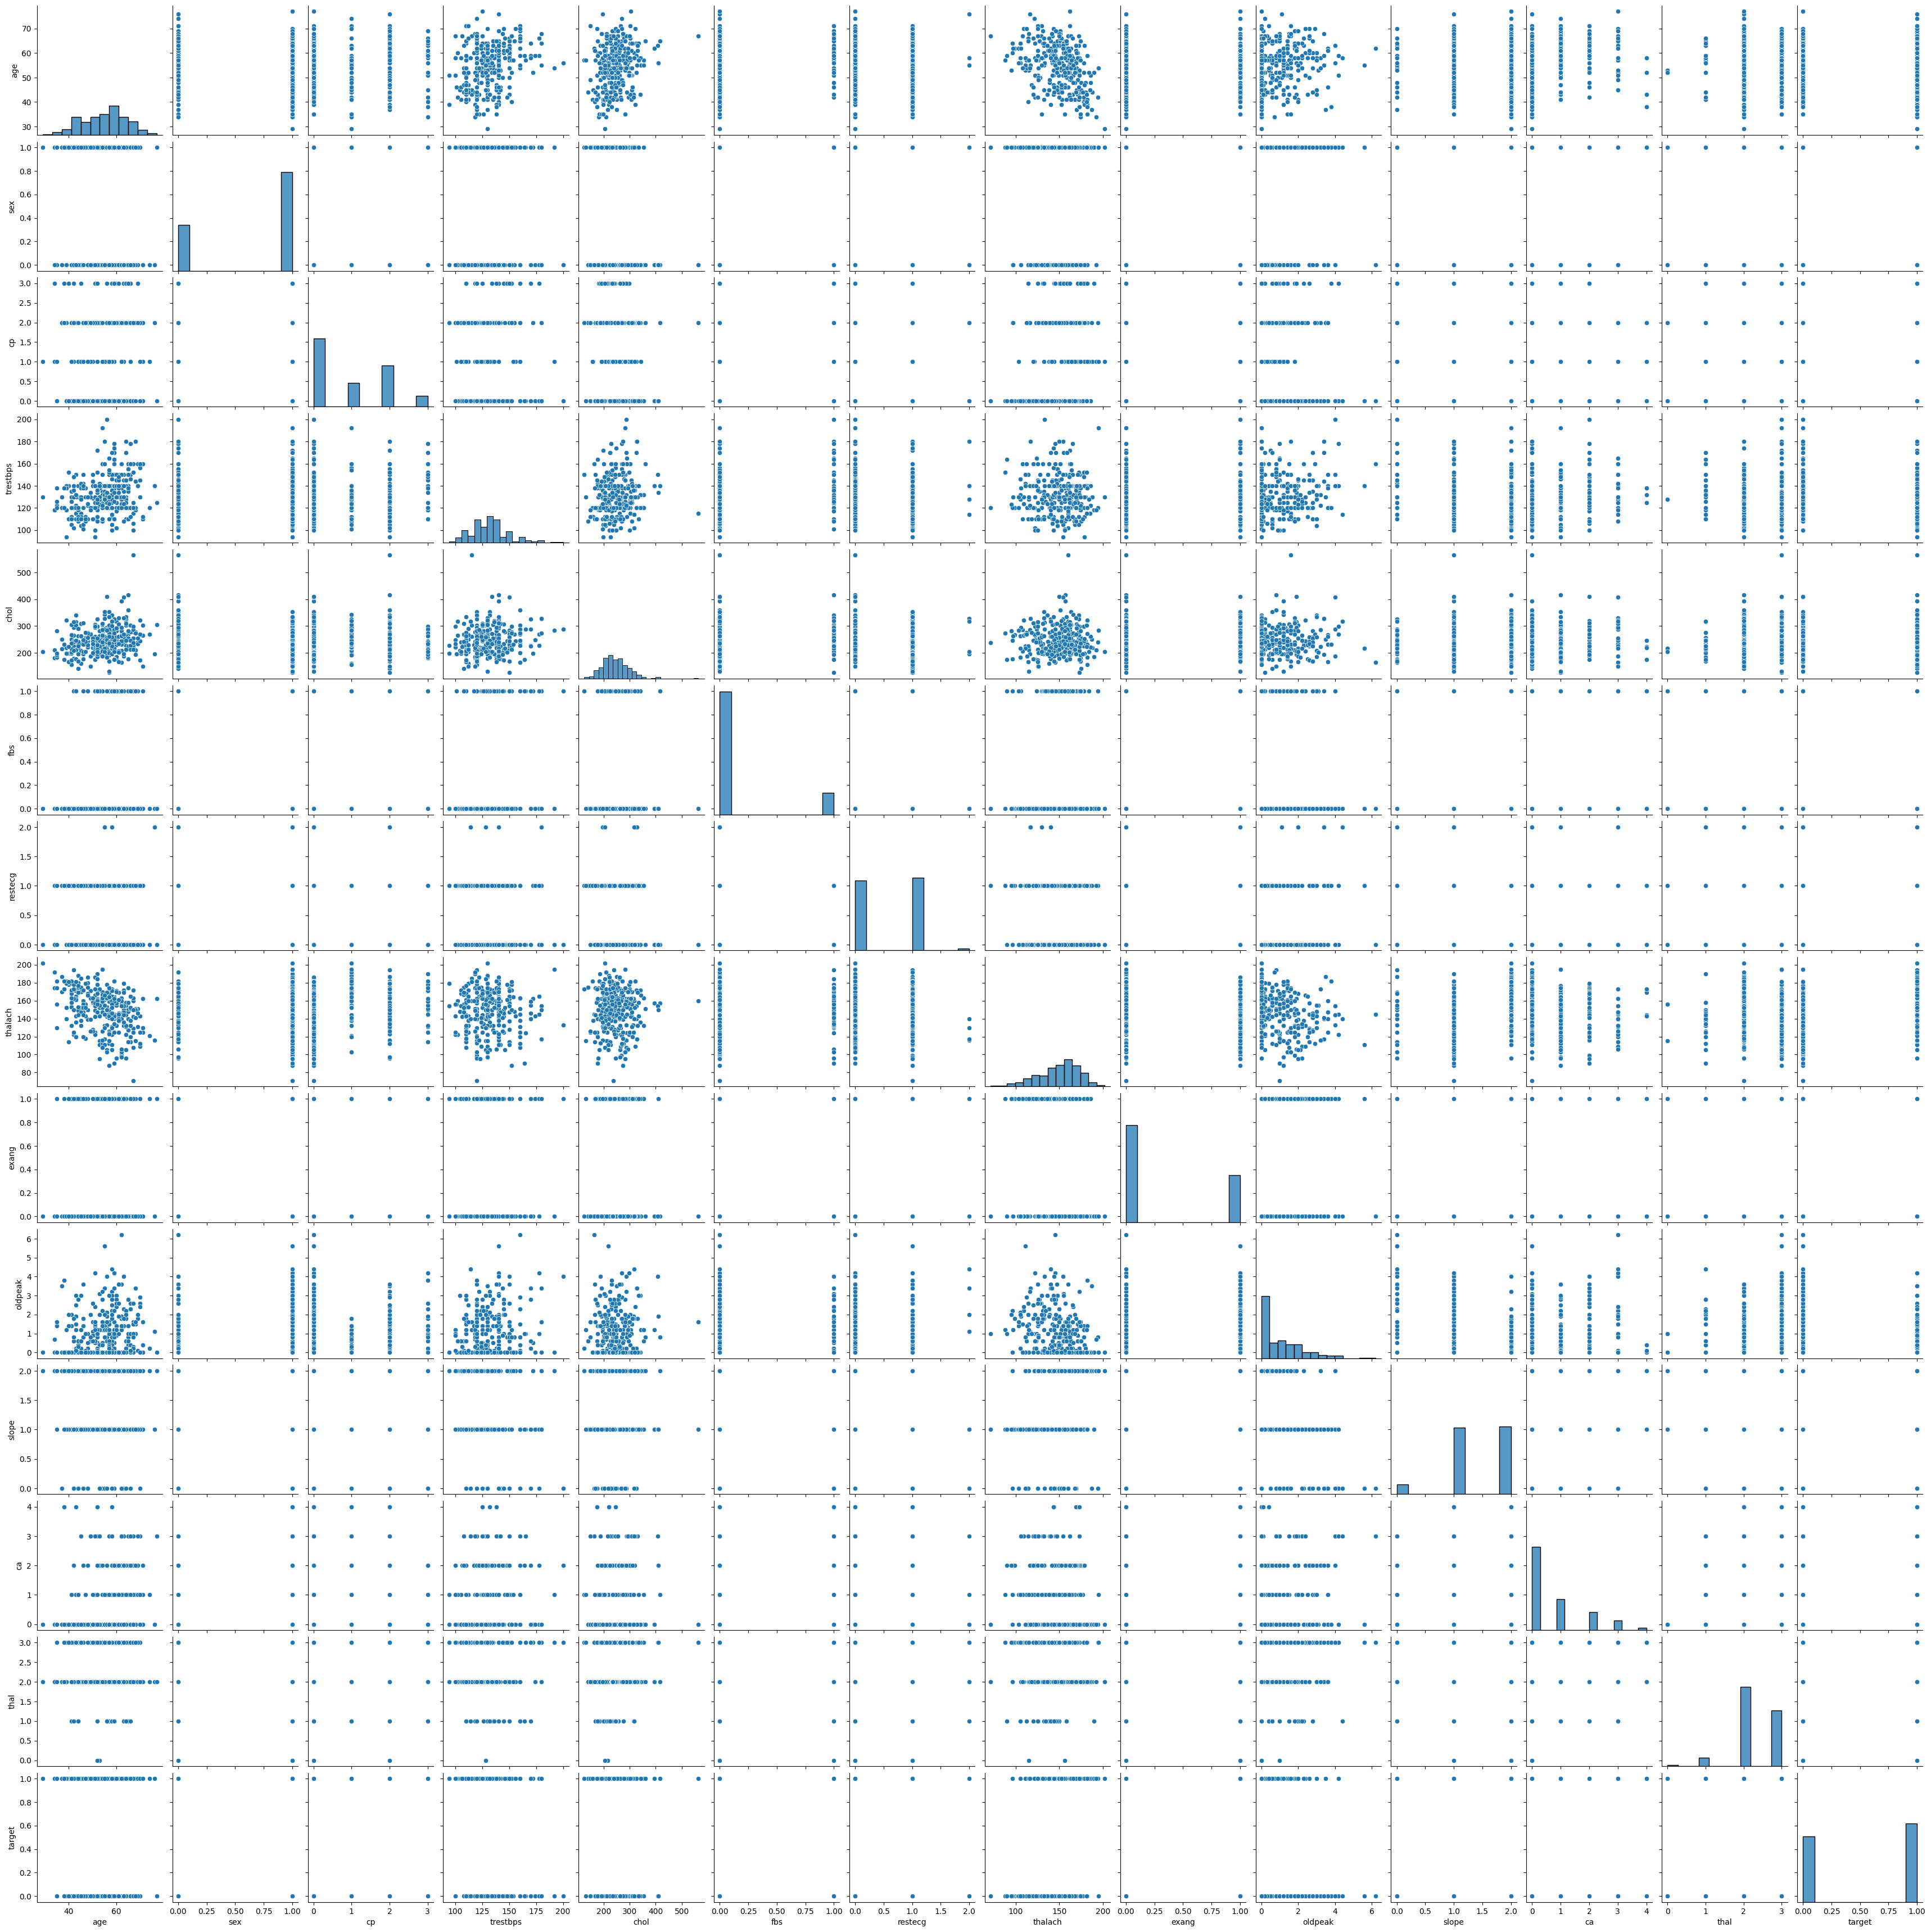

In [34]:

# Pair Plot
print('Pair plot')
sns.pairplot(data)
plt.show()


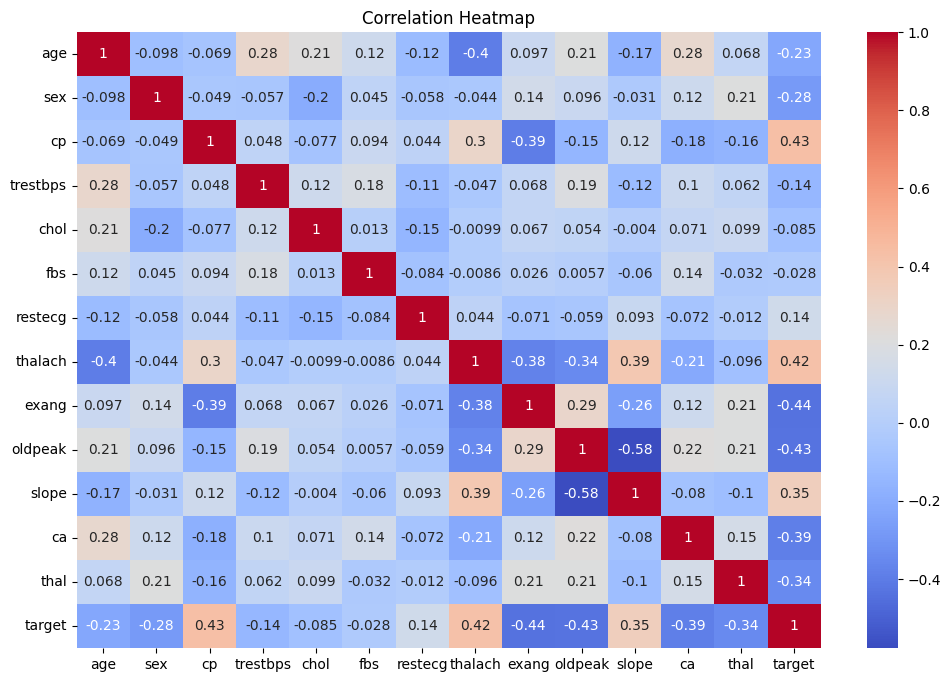

In [35]:

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [36]:

# Groupby Statistics
print("Group by stats")
print(data.groupby('target').mean())

# Detecting Outliers using IQR
print("Outlayers using IQR")
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(f'Outliers in {col}:')
    print(outliers)

Group by stats
              age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212  
Outlayers using IQR
Outliers in age:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3  

In [37]:
# Features engineering
# Select 10 best features based on the chi-squared test
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2,k= 10)
X = data.drop(columns=['target'])
y = data['target']

X_new  = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [38]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import tree

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\ndjek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


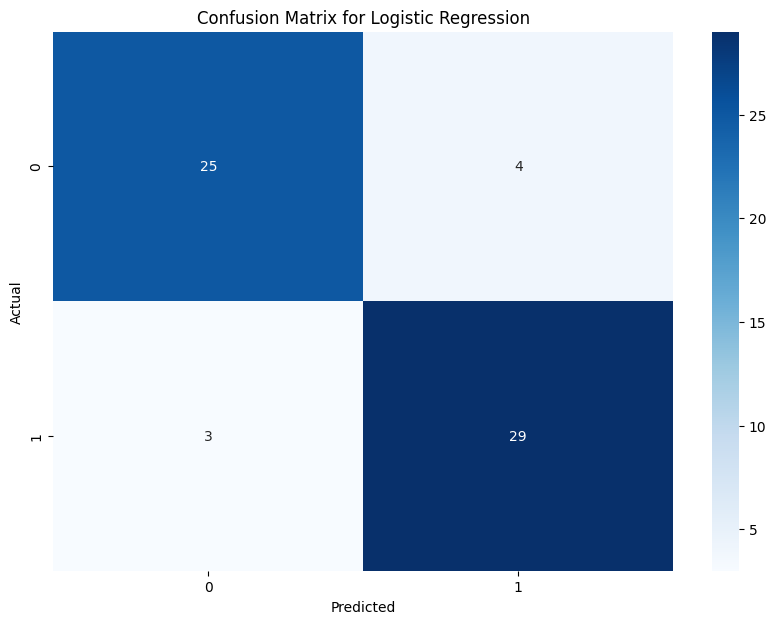

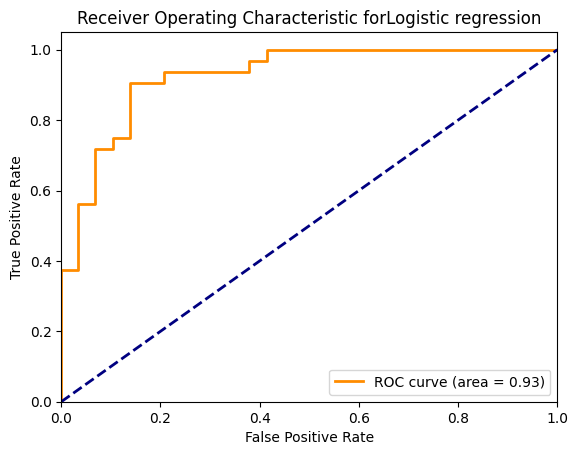

Cross-validation scores:  [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean cross-validation score:  0.8282513661202187
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308


In [39]:
# Train and evaluate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the models

log_regre = LogisticRegression(max_iter=1000)
rand_for = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True, random_state=42,kernel='linear')
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()

# Train and evaluate each model
# Logistic regression
results = {}
log_regre.fit(X_train, y_train)
y_pred = log_regre.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(log_regre, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = log_regre.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Logistic Regression'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)



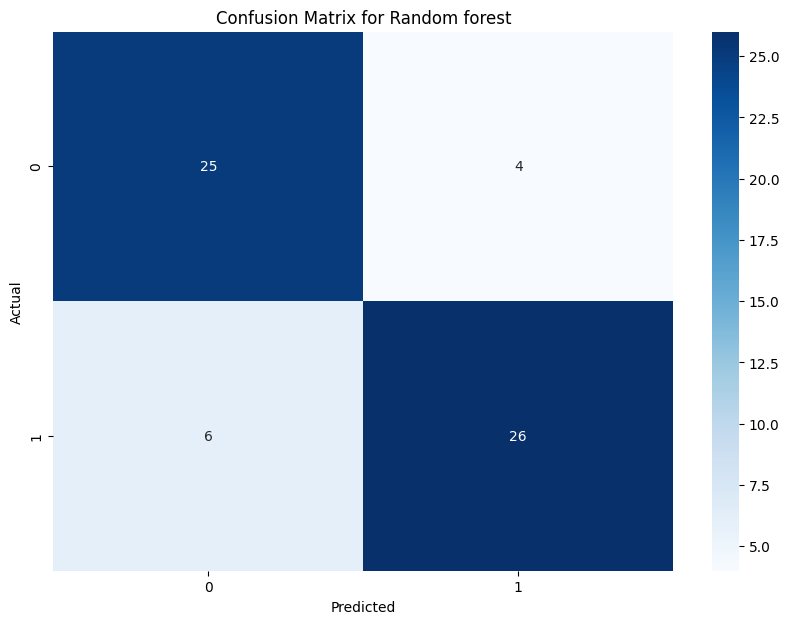

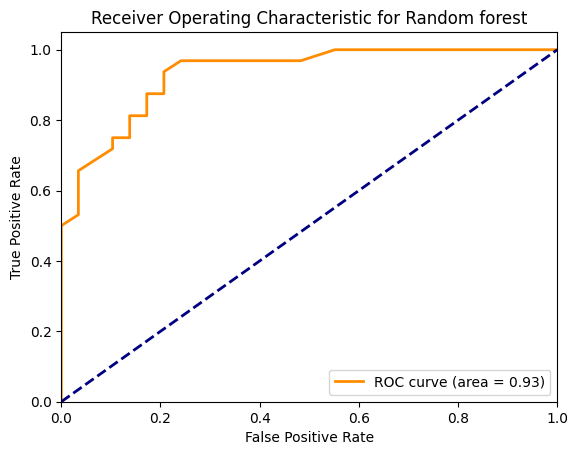

Cross-validation scores:  [0.81967213 0.86885246 0.80327869 0.78333333 0.75      ]
Mean cross-validation score:  0.8050273224043716
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.836066   0.866667  0.81250  0.838710


In [40]:
# Random forest 
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(rand_for, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = rand_for.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic for Random forest')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Random Forest'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

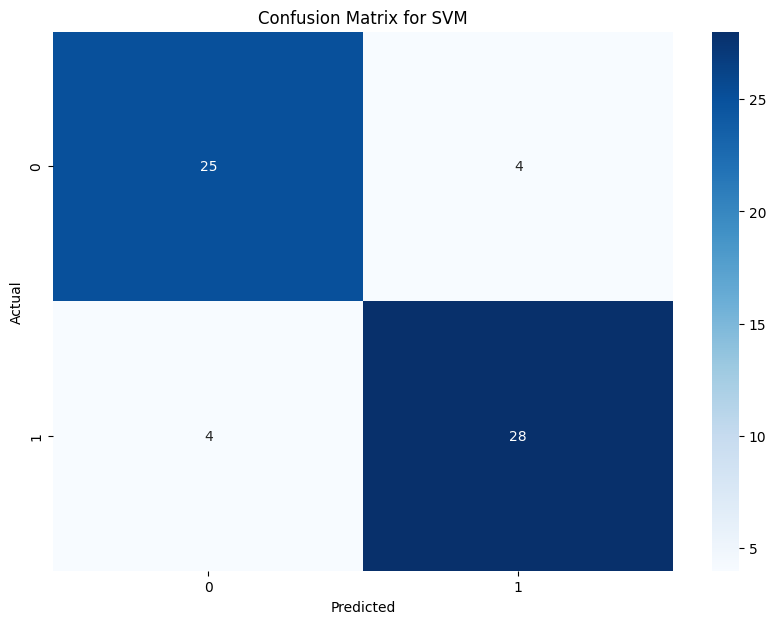

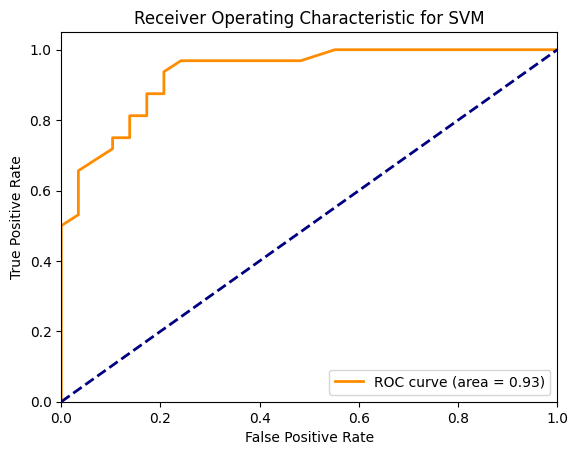

Cross-validation scores:  [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean cross-validation score:  0.8283060109289618
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.836066   0.866667  0.81250  0.838710
SVM                  0.868852   0.875000  0.87500  0.875000


In [41]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(svm, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

      

        # AUC-ROC
y_pred_prob = rand_for.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show() 
# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['SVM'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

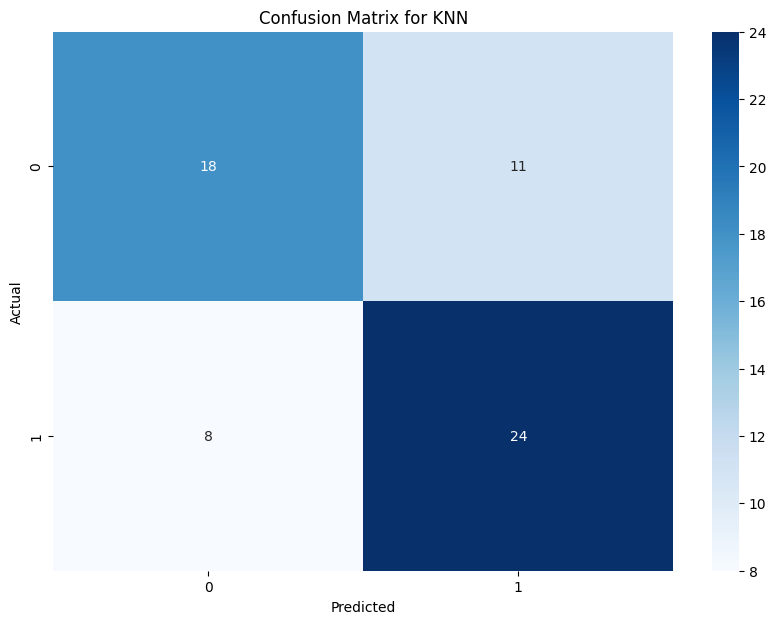

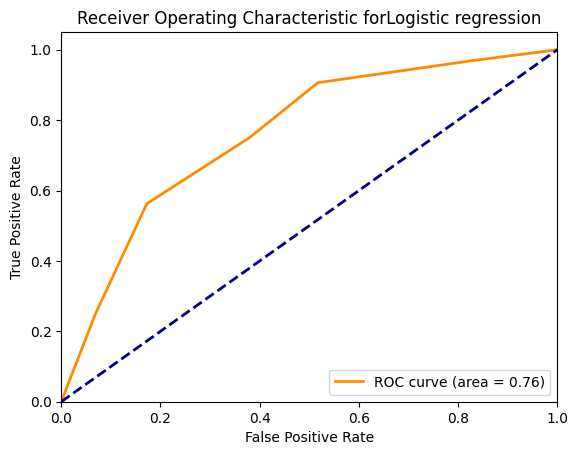

Cross-validation scores:  [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean cross-validation score:  0.643879781420765
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.836066   0.866667  0.81250  0.838710
SVM                  0.868852   0.875000  0.87500  0.875000
KNN                  0.688525   0.685714  0.75000  0.716418


In [42]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = knn.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['KNN'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

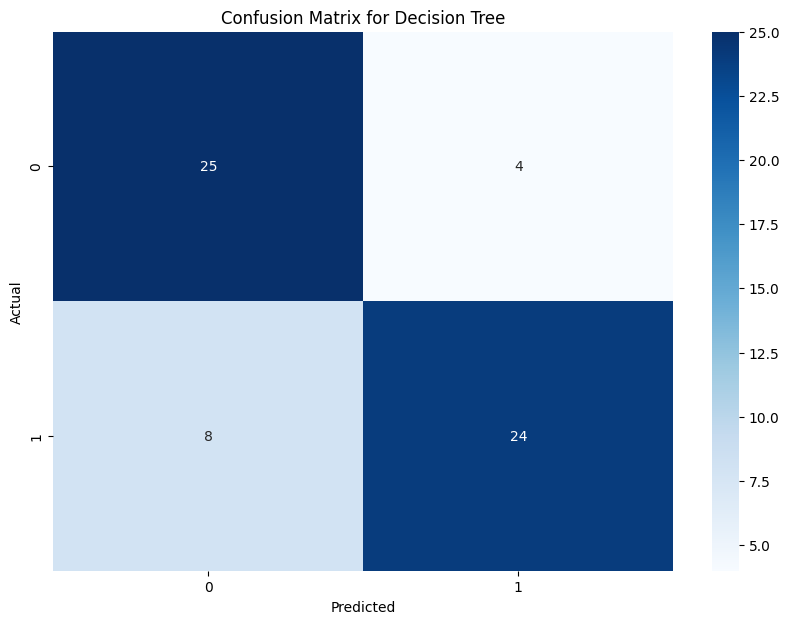

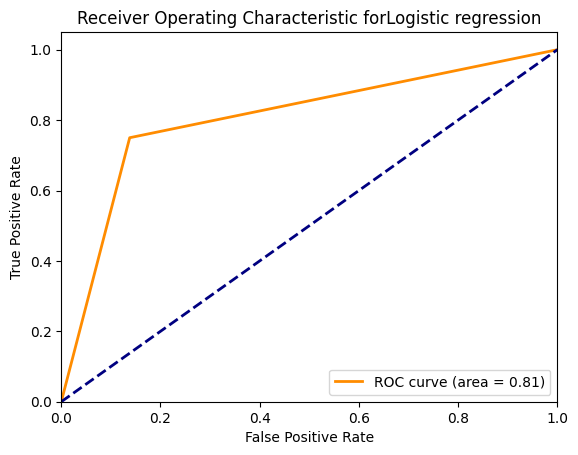

Cross-validation scores:  [0.73770492 0.80327869 0.72131148 0.73333333 0.68333333]
Mean cross-validation score:  0.7357923497267759


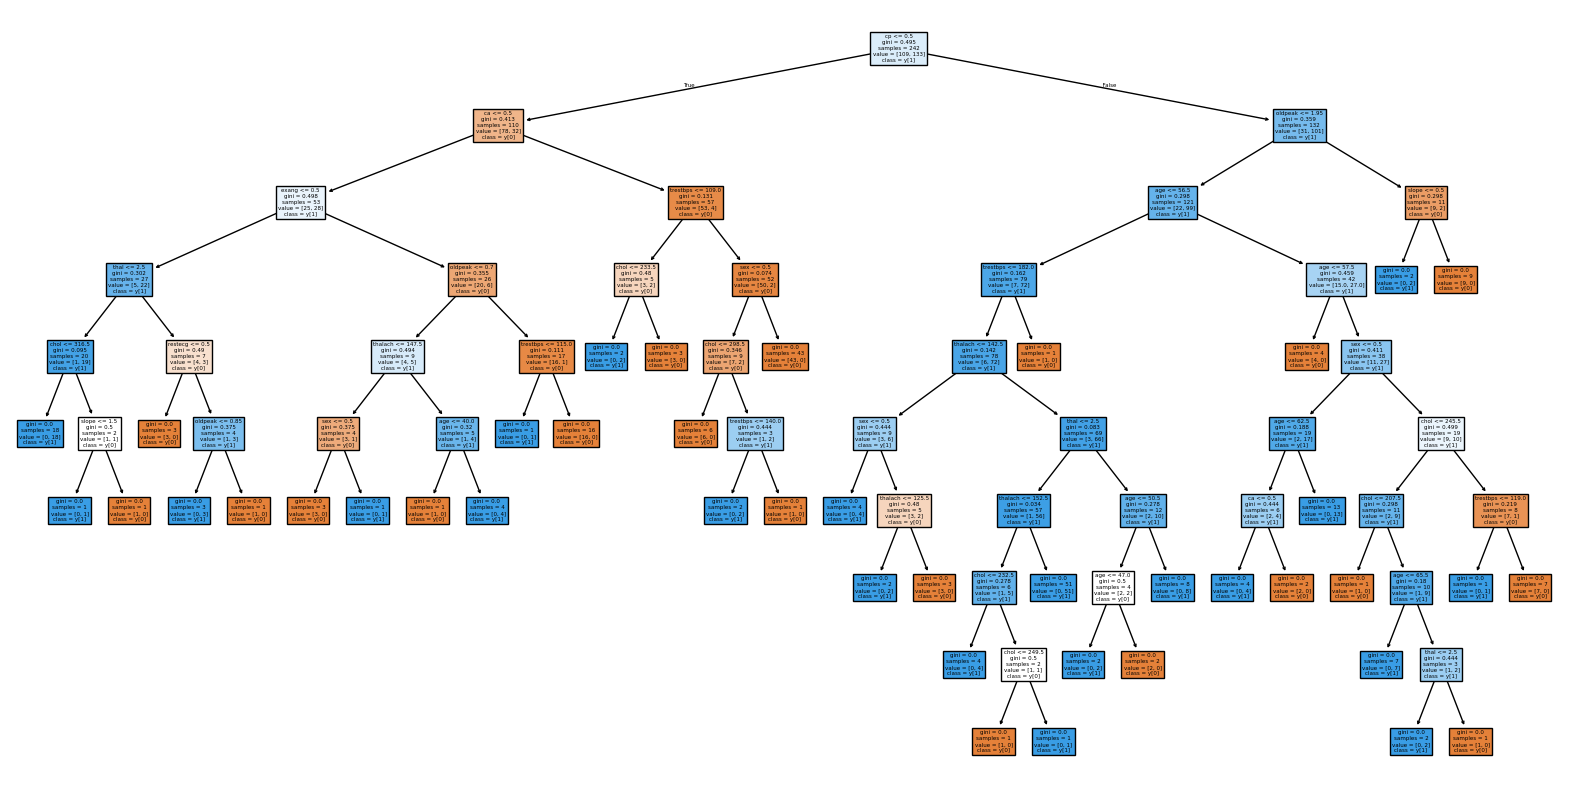

                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.836066   0.866667  0.81250  0.838710
SVM                  0.868852   0.875000  0.87500  0.875000
KNN                  0.688525   0.685714  0.75000  0.716418
Decision tree        0.803279   0.857143  0.75000  0.800000


In [43]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(dtree, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = dtree.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Decision tree'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust size as needed
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True)
plt.show()
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

In [44]:
# AUC = 0.5: The model has no discrimination capability, similar to random guessing.
# 0.5 < AUC < 0.7: The model has low discrimination capability.
# 0.7 ≤ AUC < 0.8: The model has acceptable discrimination capability.
# 0.8 ≤ AUC < 0.9: The model has excellent discrimination capability.
# AUC ≥ 0.9: The model has outstanding discrimination capability.

In [45]:
# Make a prediction

new_data = pd.DataFrame({
    'age': [63, 45],
    'sex': [1, 0],
    'cp': [3, 2],
    'trestbps': [145, 130],
    'chol': [100, 245],
    'fbs': [1, 0],
    'restecg': [0, 1],
    'thalach': [150, 234],
    'exang': [0, 1],
    'oldpeak': [2.3, 0.5],
    'slope': [1, 2],
    'ca': [0, 1],
    'thal': [3, 2]
})

results = {
    'Logistic regression prediction': log_regre.predict(new_data),
    'Decision tree prediction': dtree.predict(new_data),
    'Random forest prediction': rand_for.predict(new_data),
    'SVM prediction': svm.predict(new_data),
    'KNN': knn.predict(new_data)
}

    
   


pred_df = pd.DataFrame(results)

pred_df

,Logistic regression prediction,Decision tree prediction,Random forest prediction,SVM prediction,KNN
0,1,0,0,1,1
1,1,1,1,1,1
